In [ ]:
import numpy as np

In [ ]:
# set seed for reproducibility
seed_val = 9000
np.random.seed(seed_val)

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (60000, 28, 28)
Size of the test_set:  (10000, 28, 28)
Shape of each image:  (28, 28)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


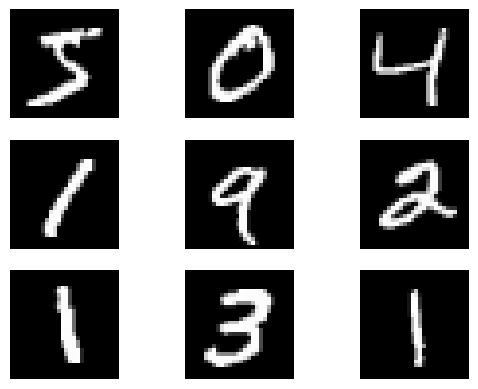

In [ ]:
import matplotlib.pyplot as plt
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i], cmap='gray') # gray scale

In [ ]:
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


In [ ]:
!pip install keras

In [ ]:
# Number of epochs
epochs = 20

# Batchsize
batch_size = 128

# Optimizer for the generator
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.001)

# Shape of the input image
input_shape = (28,28,1)

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers import Dense

In [ ]:
model.add(Dense(300, input_shape=(784,), activation = 'relu'))

In [ ]:
model.add(Dense(300,  activation='relu'))

In [ ]:
model.add(Dense(10,  activation='softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
430/430 [==============================] - 12s 25ms/step - loss: 2.4558 - accuracy: 0.8935 - val_loss: 0.7036 - val_accuracy: 0.9250
Epoch 2/20
430/430 [==============================] - 10s 24ms/step - loss: 0.4212 - accuracy: 0.9461 - val_loss: 0.6286 - val_accuracy: 0.9346
Epoch 3/20
430/430 [==============================] - 8s 20ms/step - loss: 0.2374 - accuracy: 0.9630 - val_loss: 0.4334 - val_accuracy: 0.9454
Epoch 4/20
430/430 [==============================] - 10s 24ms/step - loss: 0.1974 - accuracy: 0.9673 - val_loss: 0.4814 - val_accuracy: 0.9448
Epoch 5/20
430/430 [==============================] - 7s 15ms/step - loss: 0.1419 - accuracy: 0.9731 - val_loss: 0.3222 - val_accuracy: 0.9584
Epoch 6/20
430/430 [==============================] - 7s 17ms/step - loss: 0.1205 - accuracy: 0.9765 - val_loss: 0.3293 - val_accuracy: 0.9552
Epoch 7/20
430/430 [==============================] - 5s 12ms/step - loss: 0.1103 - accuracy: 0.9779 - val_loss: 0.2822 - val_accuracy: 0.9

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2737 - accuracy: 0.9623
Test loss: 0.27371108531951904
Accuracy: 0.9623000025749207


Accuracy Improved to 96 % from 95 by changing the learning rate from 0.0001 to 0.001

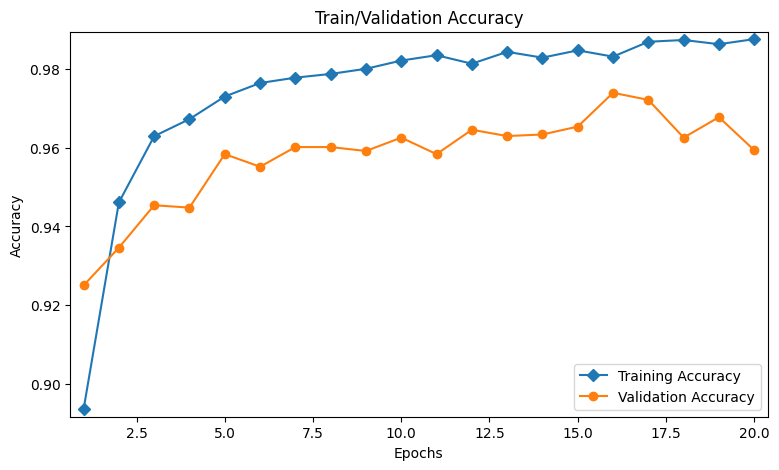

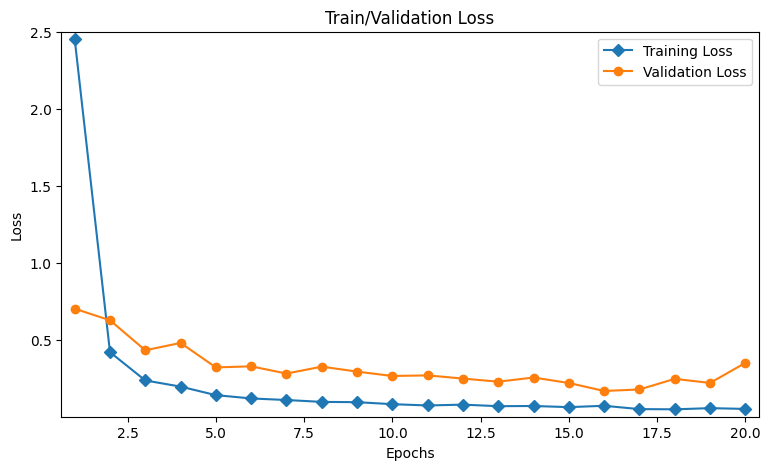

In [ ]:
import matplotlib.pyplot as plt

def loss_plot(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_acc,  marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1,len(train_acc)+1),val_acc,  marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1,len(train_acc)+1),val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()

loss_plot(history)


# **CONVOLUTION**

In [ ]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
kernel = np.array([-1, 1, 0])

# empty feature map
conv_result = np.zeros(array.shape[0] - kernel.shape[0] +1).astype(int)

for i in range(array.shape[0] - kernel.shape[0] +1):
    # convolving
    conv_result[i] = (kernel * array[i:i+3]).sum()
    print(kernel, '*', array[i:i+3], '=', conv_result[i])

print('Feature Map :', conv_result)


[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
Feature Map : [ 1 -1  1 -1  1 -1  1 -1]


In [ ]:
from keras.layers import Conv2D

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.08333, random_state=42)
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Train data shape: (50416, 28, 28, 1)
Val data shape: (4584, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))

In [ ]:
from keras.layers import Flatten
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation = 'relu'))

In [ ]:
model.add(Dense(10, activation = 'softmax'))

In [ ]:
from keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               2769024   
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2770634 (10.57 MB)
Trainable params: 2770634 (10.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 70s 172ms/step - loss: 1.3662 - accuracy: 0.9031 - val_loss: 0.2038 - val_accuracy: 0.9535
Epoch 2/20
394/394 [==============================] - 80s 204ms/step - loss: 0.1028 - accuracy: 0.9718 - val_loss: 0.1341 - val_accuracy: 0.9664
Epoch 3/20
394/394 [==============================] - 66s 166ms/step - loss: 0.0534 - accuracy: 0.9842 - val_loss: 0.1244 - val_accuracy: 0.9703
Epoch 4/20
394/394 [==============================] - 57s 143ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.1434 - val_accuracy: 0.9668
Epoch 5/20
394/394 [==============================] - 58s 147ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.1337 - val_accuracy: 0.9738
Epoch 6/20
394/394 [==============================] - 57s 144ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.1644 - val_accuracy: 0.9699
Epoch 7/20
394/394 [==============================] - 56s 141ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.1738 - val_ac

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.1875 - accuracy: 0.9777
Test loss: 0.18746261298656464
Accuracy: 0.9776999950408936


Accuracy remains same "97" after changing learning rate to 0.001

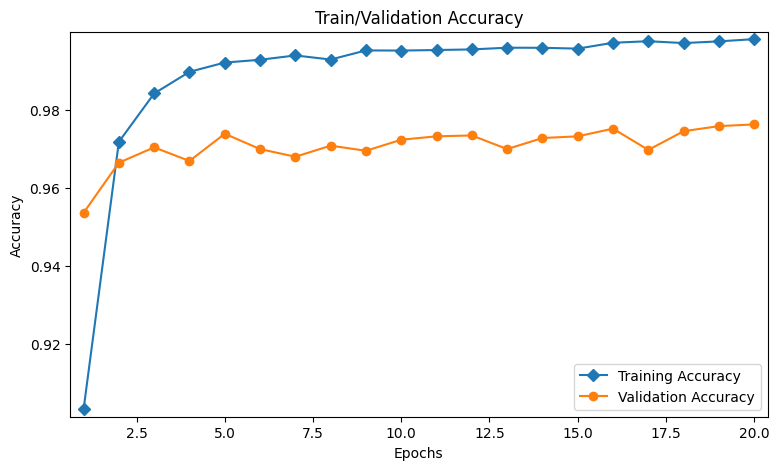

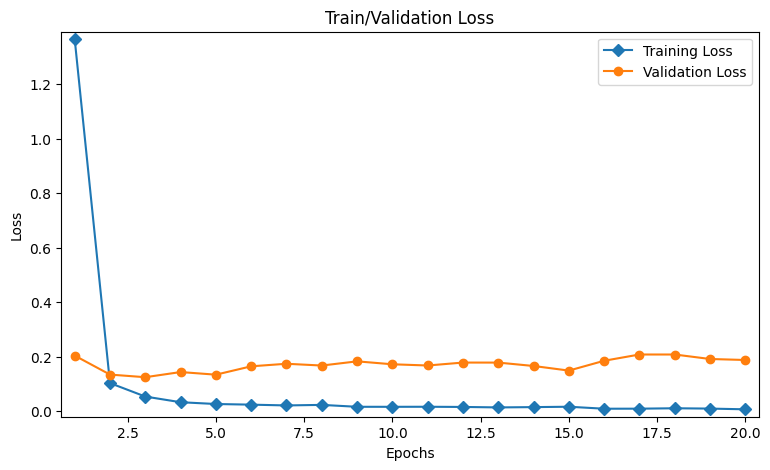

In [ ]:
loss_plot(history)

# **POOLING**

In [ ]:
import numpy as np
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.max(array[2*i:2*i+2])
result

array([1., 1., 1., 1., 1.])

In [ ]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.mean(array[2*i:2*i+2])
result

array([0.5, 0.5, 0.5, 0.5, 0.5])

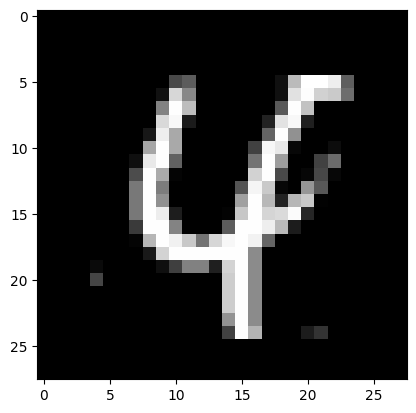

In [ ]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [ ]:
def square_max_pool(image, pool_size=2):
    result = np.zeros((14,14))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.max(image[i*pool_size : i*pool_size+pool_size, j*pool_size : j*pool_size+pool_size])

    return result

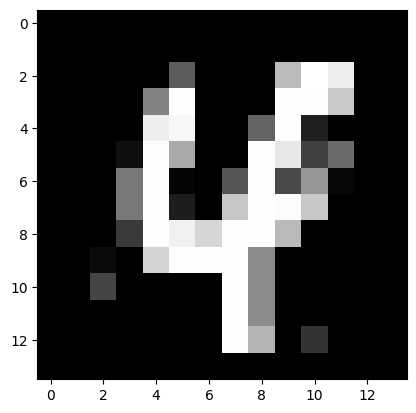

In [ ]:
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='gray')

In [ ]:
from keras.layers import AveragePooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               692352    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 27s 66ms/step - loss: 0.8544 - accuracy: 0.9188 - val_loss: 0.1043 - val_accuracy: 0.9692
Epoch 2/20
394/394 [==============================] - 26s 67ms/step - loss: 0.0767 - accuracy: 0.9773 - val_loss: 0.0867 - val_accuracy: 0.9753
Epoch 3/20
394/394 [==============================] - 26s 67ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.1096 - val_accuracy: 0.9756
Epoch 4/20
394/394 [==============================] - 27s 68ms/step - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.0896 - val_accuracy: 0.9812
Epoch 5/20
394/394 [==============================] - 25s 63ms/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 0.0916 - val_accuracy: 0.9793
Epoch 6/20
394/394 [==============================] - 26s 65ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.1055 - val_accuracy: 0.9786
Epoch 7/20
394/394 [==============================] - 26s 66ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0948 - val_accuracy:

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.1024 - accuracy: 0.9817
Test loss: 0.10235319286584854
Accuracy: 0.9817000031471252


Accuracy Changed to 98% from 97% by changing max pooling to avg pooling,leanring rate from 0.0001 to 0.001

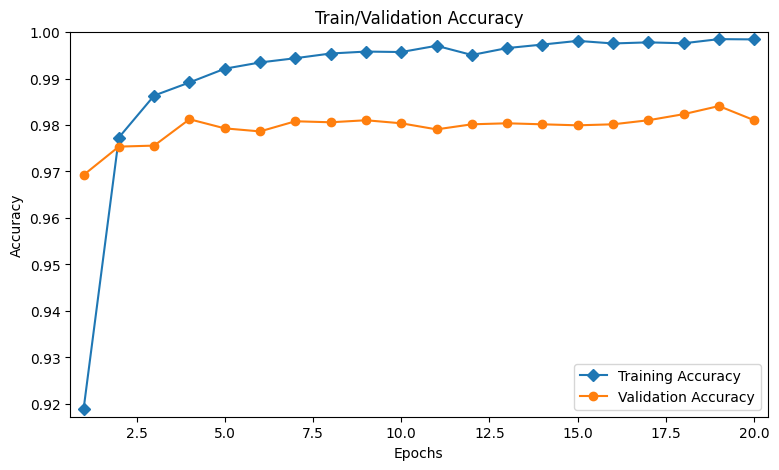

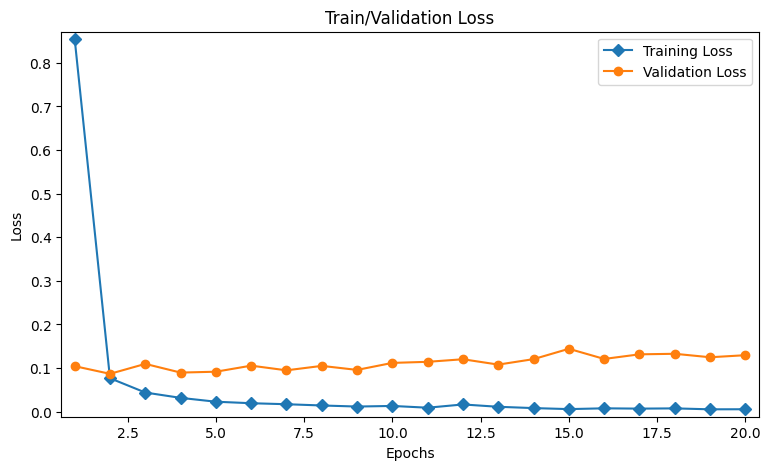

In [ ]:
loss_plot(history)

# **DROP** **OUT**

In [ ]:
from keras.layers import Dropout
from keras.layers import AveragePooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_1 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 41s 102ms/step - loss: 0.8531 - accuracy: 0.8583 - val_loss: 0.1353 - val_accuracy: 0.9627
Epoch 2/20
394/394 [==============================] - 30s 76ms/step - loss: 0.1607 - accuracy: 0.9531 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 3/20
394/394 [==============================] - 31s 78ms/step - loss: 0.1048 - accuracy: 0.9680 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 4/20
394/394 [==============================] - 30s 76ms/step - loss: 0.0787 - accuracy: 0.9753 - val_loss: 0.0659 - val_accuracy: 0.9825
Epoch 5/20
394/394 [==============================] - 31s 78ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.0594 - val_accuracy: 0.9825
Epoch 6/20
394/394 [==============================] - 33s 83ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0675 - val_accuracy: 0.9801
Epoch 7/20
394/394 [==============================] - 30s 76ms/step - loss: 0.0509 - accuracy: 0.9833 - val_loss: 0.0612 - val_accuracy

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0694 - accuracy: 0.9859
Test loss: 0.06937475502490997
Accuracy: 0.9858999848365784


Accuracy remain same 98%

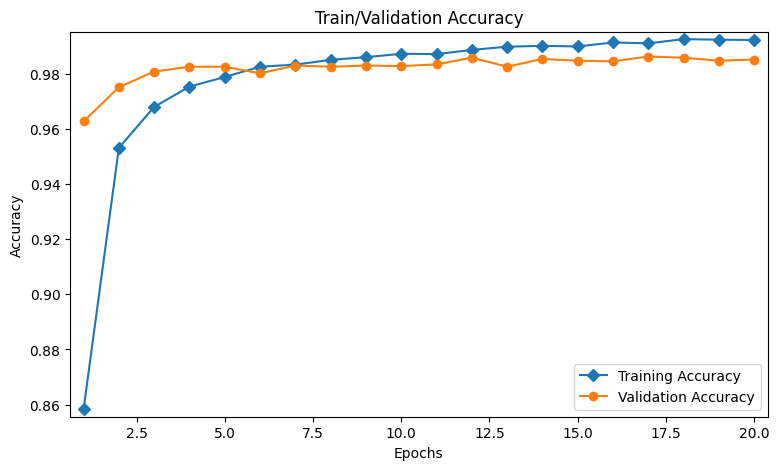

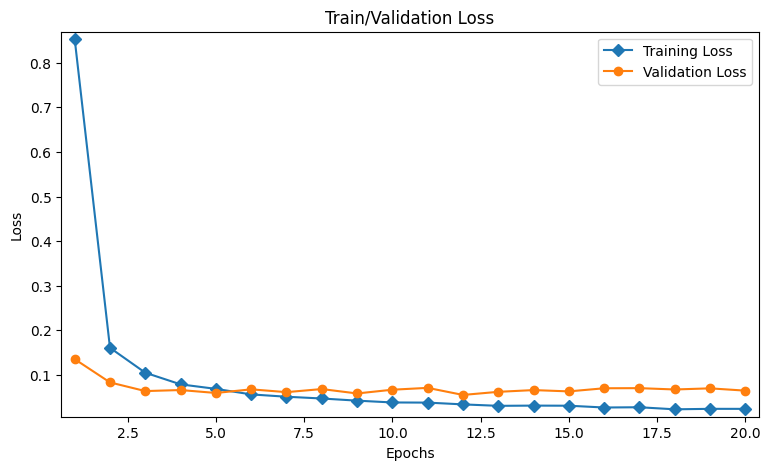

In [ ]:
loss_plot(history)

# **DEEPER CONVOLUTION**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(learning_rate=0.001) , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_2 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)         

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 58s 145ms/step - loss: 0.5908 - accuracy: 0.8254 - val_loss: 0.0982 - val_accuracy: 0.9653
Epoch 2/20
394/394 [==============================] - 51s 130ms/step - loss: 0.1652 - accuracy: 0.9502 - val_loss: 0.0720 - val_accuracy: 0.9758
Epoch 3/20
394/394 [==============================] - 49s 124ms/step - loss: 0.1216 - accuracy: 0.9642 - val_loss: 0.0585 - val_accuracy: 0.9784
Epoch 4/20
394/394 [==============================] - 52s 133ms/step - loss: 0.0987 - accuracy: 0.9705 - val_loss: 0.0446 - val_accuracy: 0.9845
Epoch 5/20
394/394 [==============================] - 51s 129ms/step - loss: 0.0876 - accuracy: 0.9743 - val_loss: 0.0438 - val_accuracy: 0.9867
Epoch 6/20
394/394 [==============================] - 51s 129ms/step - loss: 0.0789 - accuracy: 0.9759 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 7/20
394/394 [==============================] - 51s 129ms/step - loss: 0.0701 - accuracy: 0.9790 - val_loss: 0.0345 - val_ac

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0327 - accuracy: 0.9907
Test loss: 0.03266802802681923
Accuracy: 0.9907000064849854


98.7% accuracy changed to 99% by changing max pooling to avg pooling in deeper convolution

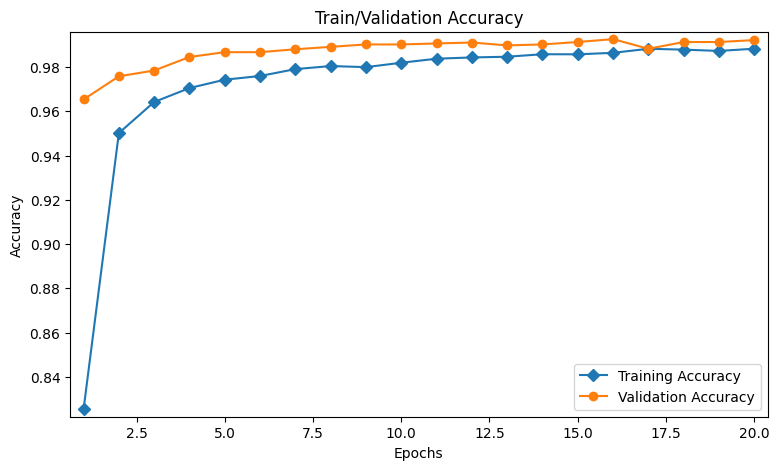

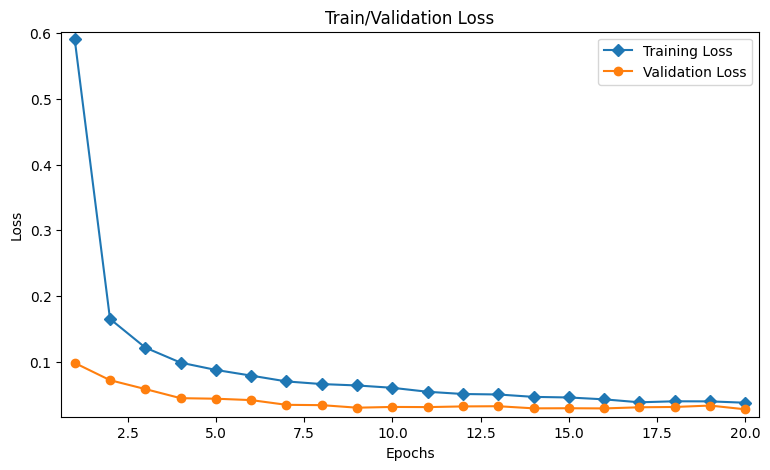

In [ ]:
loss_plot(history)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_5 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_6 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [ ]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/40
394/394 [==============================] - 59s 145ms/step - loss: 1.5001 - accuracy: 0.5469 - val_loss: 0.3969 - val_accuracy: 0.8874
Epoch 2/40
394/394 [==============================] - 51s 130ms/step - loss: 0.5359 - accuracy: 0.8294 - val_loss: 0.2094 - val_accuracy: 0.9394
Epoch 3/40
394/394 [==============================] - 51s 128ms/step - loss: 0.3606 - accuracy: 0.8898 - val_loss: 0.1504 - val_accuracy: 0.9540
Epoch 4/40
394/394 [==============================] - 53s 133ms/step - loss: 0.2763 - accuracy: 0.9159 - val_loss: 0.1229 - val_accuracy: 0.9581
Epoch 5/40
394/394 [==============================] - 51s 129ms/step - loss: 0.2328 - accuracy: 0.9294 - val_loss: 0.1058 - val_accuracy: 0.9625
Epoch 6/40
394/394 [==============================] - 49s 125ms/step - loss: 0.1991 - accuracy: 0.9404 - val_loss: 0.0908 - val_accuracy: 0.9701
Epoch 7/40
394/394 [==============================] - 53s 134ms/step - loss: 0.1795 - accuracy: 0.9454 - val_loss: 0.0802 - val_ac

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0298 - accuracy: 0.9909
Test loss: 0.029768679291009903
Accuracy: 0.9908999800682068


98% accuracy to 99%

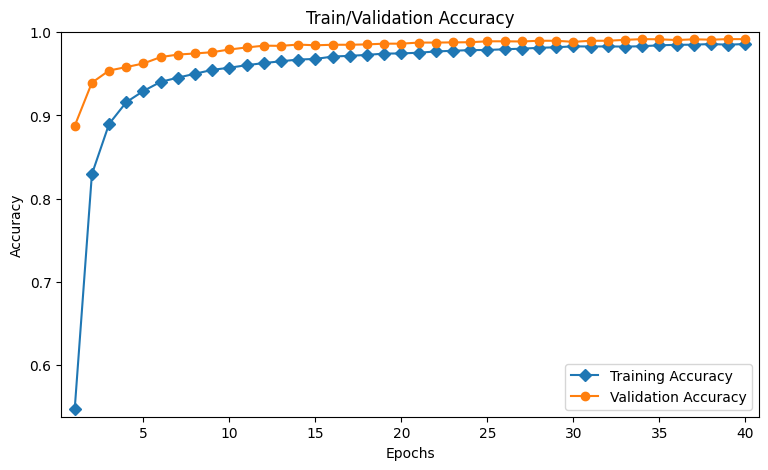

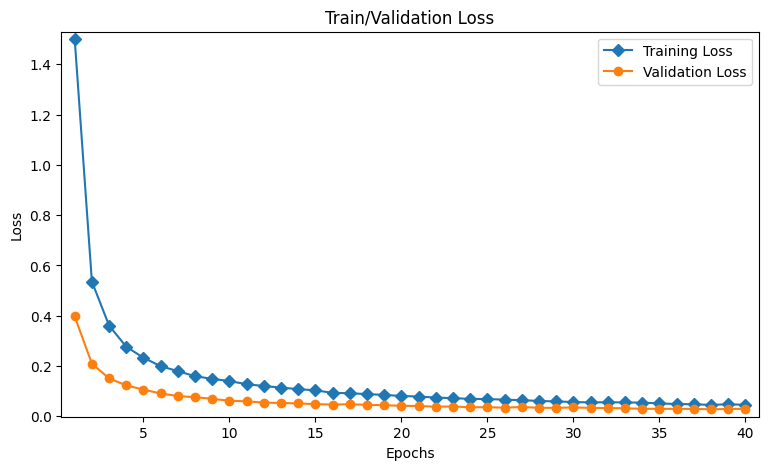

In [ ]:
loss_plot(history)

# **DATA AUGMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True)

In [ ]:
train_datagen.fit(X_train)

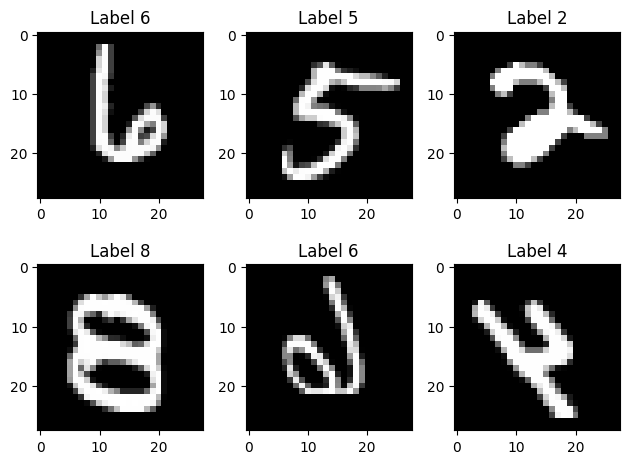

In [ ]:
# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

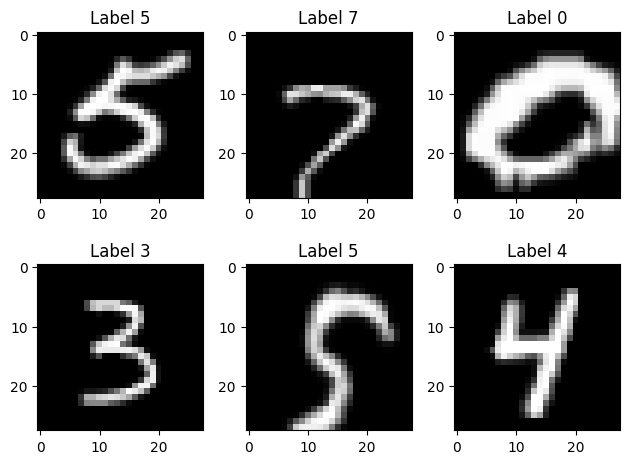

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.3)
#fit
train_datagen.fit(X_train)

#transform
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
train_datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics = ['accuracy'])

In [ ]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128, epochs=10,
                    validation_data=(train_datagen.flow(X_val, y_val)))

Epoch 1/10


<ipython-input-71-37af3a342e8b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),


393/393 [==============================] - 65s 159ms/step - loss: 0.9380 - accuracy: 0.6832 - val_loss: 0.4101 - val_accuracy: 0.8713
Epoch 2/10
393/393 [==============================] - 65s 166ms/step - loss: 0.4586 - accuracy: 0.8537 - val_loss: 0.2842 - val_accuracy: 0.9123
Epoch 3/10
393/393 [==============================] - 64s 162ms/step - loss: 0.3601 - accuracy: 0.8870 - val_loss: 0.2346 - val_accuracy: 0.9302
Epoch 4/10
393/393 [==============================] - 64s 162ms/step - loss: 0.3006 - accuracy: 0.9069 - val_loss: 0.1876 - val_accuracy: 0.9396
Epoch 5/10
393/393 [==============================] - 65s 165ms/step - loss: 0.2725 - accuracy: 0.9154 - val_loss: 0.1717 - val_accuracy: 0.9459
Epoch 6/10
393/393 [==============================] - 65s 164ms/step - loss: 0.2400 - accuracy: 0.9255 - val_loss: 0.1503 - val_accuracy: 0.9555
Epoch 7/10
393/393 [==============================] - 63s 159ms/step - loss: 0.2196 - accuracy: 0.9305 - val_loss: 0.1441 - val_accuracy: 0.9

In [ ]:
for test_img, test_lab in train_datagen.flow(X_test, y_test, batch_size = X_test.shape[0]):
    break

loss,acc = model.evaluate(test_img, test_lab)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.1063 - accuracy: 0.9647
Test loss: 0.10634611546993256
Accuracy: 0.9646999835968018


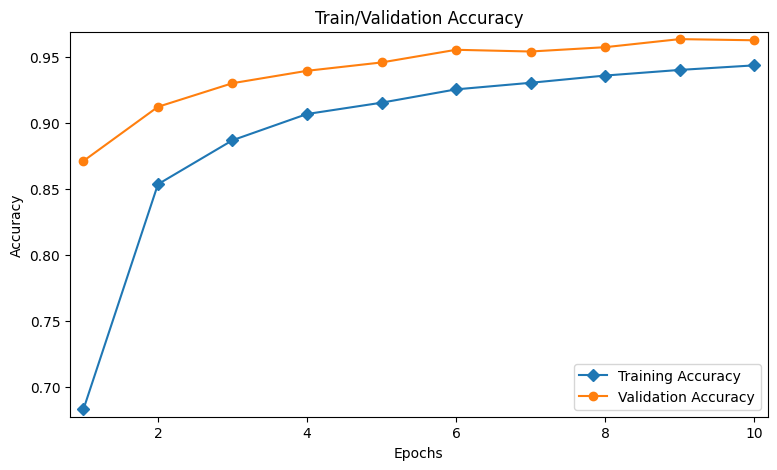

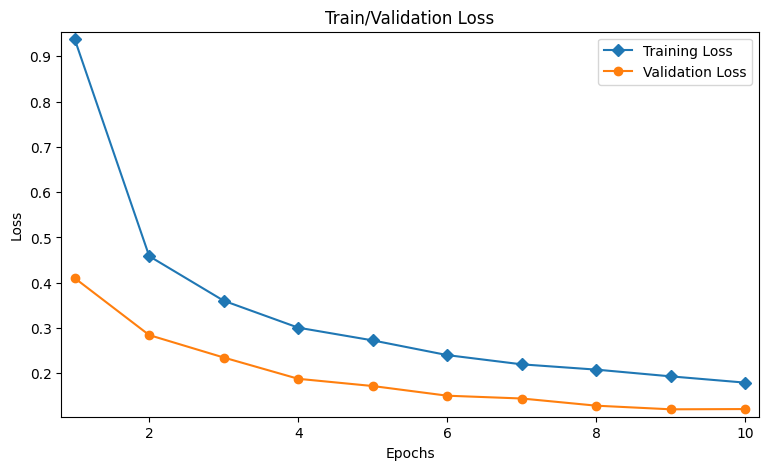

In [ ]:
loss_plot(history)

# **AUTOENCODER**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k

# for resizing images
from skimage.transform import resize

In [ ]:
def reshape(x):
    """Reshape images to 14*14"""
    img = resize(x.reshape(28,28), (14, 14))
    return img

# create 14*14 low resolution train and test images
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])


In [ ]:
# scale images to range between 0 and 1
#14*14 train images
XX_train = XX_train/255
#28*28 train label images
X_train = X_train/255

#14*14 test images
XX_test = XX_test/255
#28*28 test label images
X_test = X_test/255

In [ ]:
batch_size = 128
epochs = 20
input_shape = (14,14,1)

def make_autoencoder(input_shape):

    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.0002, beta_1=0.5))

autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 64)          0         
 D)                                                              
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)       

In [ ]:
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1), X_train.reshape(-1,28,28,1), batch_size=batch_size,epochs=epochs,verbose=1,validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 332s 882ms/step - loss: 0.0269 - val_loss: 0.0094
Epoch 2/20
375/375 [==============================] - 328s 876ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 3/20
375/375 [==============================] - 331s 884ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 4/20
375/375 [==============================] - 330s 879ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 5/20
375/375 [==============================] - 332s 887ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/20
375/375 [==============================] - 325s 866ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/20
375/375 [==============================] - 331s 883ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 8/20
375/375 [==============================] - 330s 879ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/20
375/375 [==============================] - 332s 885ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/20
375/375 [==============================] - 333s 887m

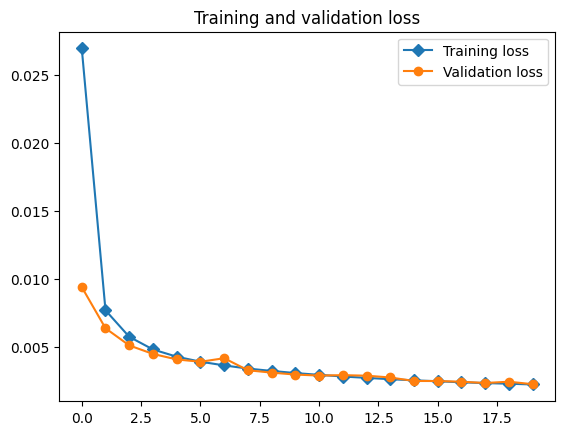

Input


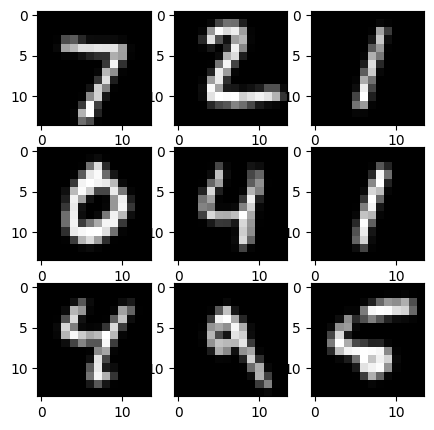

GENERATED


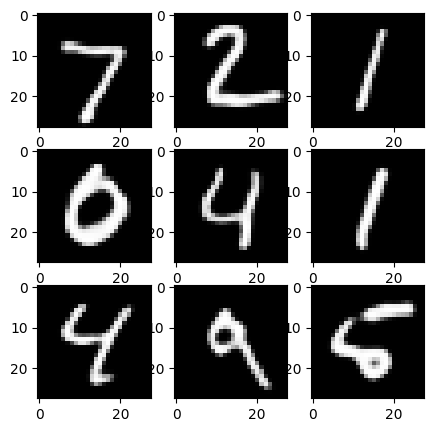

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()